In [6]:
library(ggplot2)
library(tibble)
library(tidyverse)
library(readr)
library(scales)
library(RCurl)
library(tidyquant)

## Exercise 1: Global Mobility Report

Select a couple of European countries of your choice and analyze the trends in the previous
variables over time:
- produce a plot of the data by averaging the observable over a period of one week (hint:
convert the data field to lubridate::week) and one month and quantify the impact of COVID19 restrictions on mobility sitations.

In [7]:
data <- read.csv("Global_Mobility_Report.csv",header = T)

In [8]:
head(data)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0,4,5,0,2,1
2,AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1,4,4,1,2,1
3,AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1,1,5,1,2,1
4,AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2,1,5,0,2,1
5,AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2,0,4,-1,2,1
6,AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-20,-2,1,6,1,1,1


In [9]:
Mobility_Peru <- data %>%
  filter(country_region == "Peru") 

In [10]:
head(Mobility_Peru,60)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,PE,Peru,,,,,NA,ChIJ9RRZwFDIBZERSAYheRIBnvI,2020-02-15,4,1,3,3,0,-1
2,PE,Peru,,,,,NA,ChIJ9RRZwFDIBZERSAYheRIBnvI,2020-02-16,1,0,-2,2,0,0
3,PE,Peru,,,,,NA,ChIJ9RRZwFDIBZERSAYheRIBnvI,2020-02-17,0,1,1,2,1,0
4,PE,Peru,,,,,NA,ChIJ9RRZwFDIBZERSAYheRIBnvI,2020-02-18,0,0,0,1,1,0
5,PE,Peru,,,,,NA,ChIJ9RRZwFDIBZERSAYheRIBnvI,2020-02-19,0,-1,0,0,1,1
6,PE,Peru,,,,,NA,ChIJ9RRZwFDIBZERSAYheRIBnvI,2020-02-20,0,-1,-1,3,0,0
7,PE,Peru,,,,,NA,ChIJ9RRZwFDIBZERSAYheRIBnvI,2020-02-21,-1,-2,1,1,1,1
8,PE,Peru,,,,,NA,ChIJ9RRZwFDIBZERSAYheRIBnvI,2020-02-22,1,-1,3,4,0,0
9,PE,Peru,,,,,NA,ChIJ9RRZwFDIBZERSAYheRIBnvI,2020-02-23,-1,-2,0,0,0,0


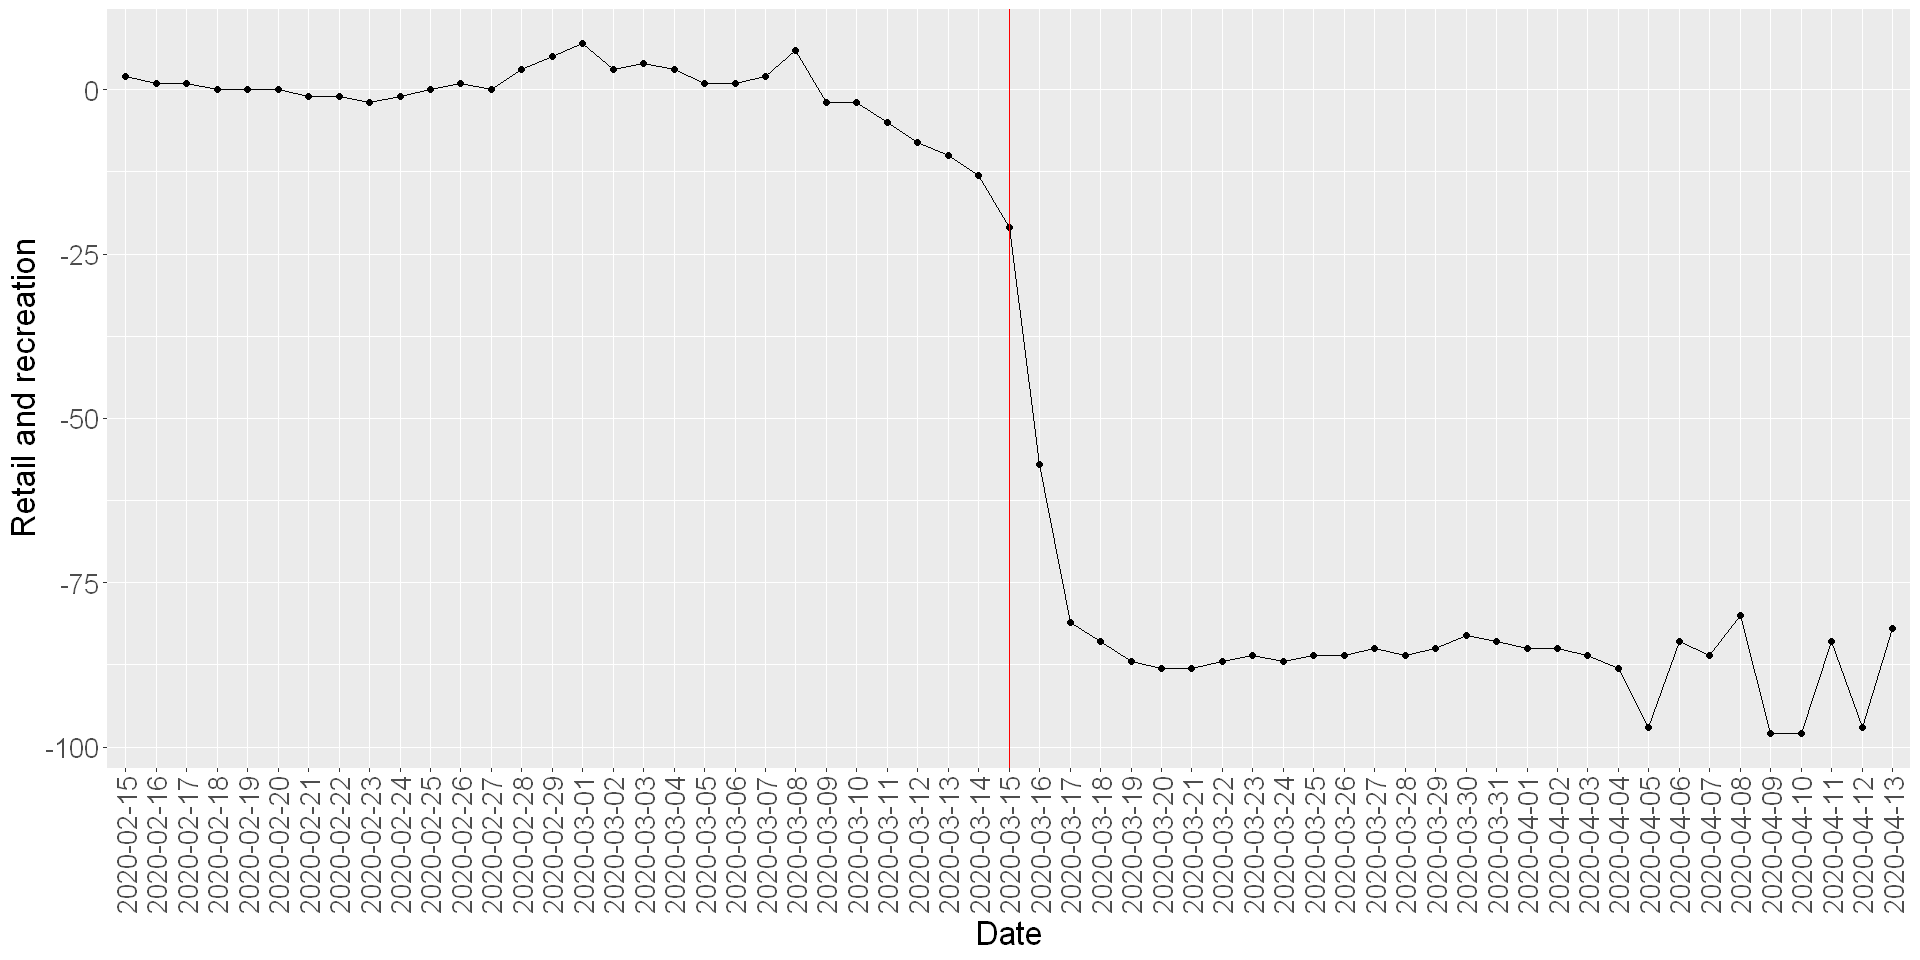

In [11]:
#Just doing some testing with the dataset. I remember our president ordered absolute curfews after the start of the quarantine.
#They can be seen as the black dots near the -100 mark
#I also filter Lima because it was fairly obedient with the quarantine 
options(repr.plot.width=16, repr.plot.height=8)
Mobility_Peru %>% 
  filter(date < "2020-04-14") %>% 
  filter(sub_region_1 == "Lima Province")%>% 

  ggplot(aes(x = date,y = retail_and_recreation_percent_change_from_baseline,group=1))+
  geom_point()+geom_line() + geom_vline(xintercept = "2020-03-15",col ="red")+ labs(x = "Date",y="Retail and recreation")+scale_y_continuous(labels=comma)+ 
  theme(text = element_text(size = 20), axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [12]:
Mobility_EU <- data %>%
  filter(country_region %in% c("Italy","France","Germany","Spain","Sweden"))  %>%
  filter(sub_region_1 == "")


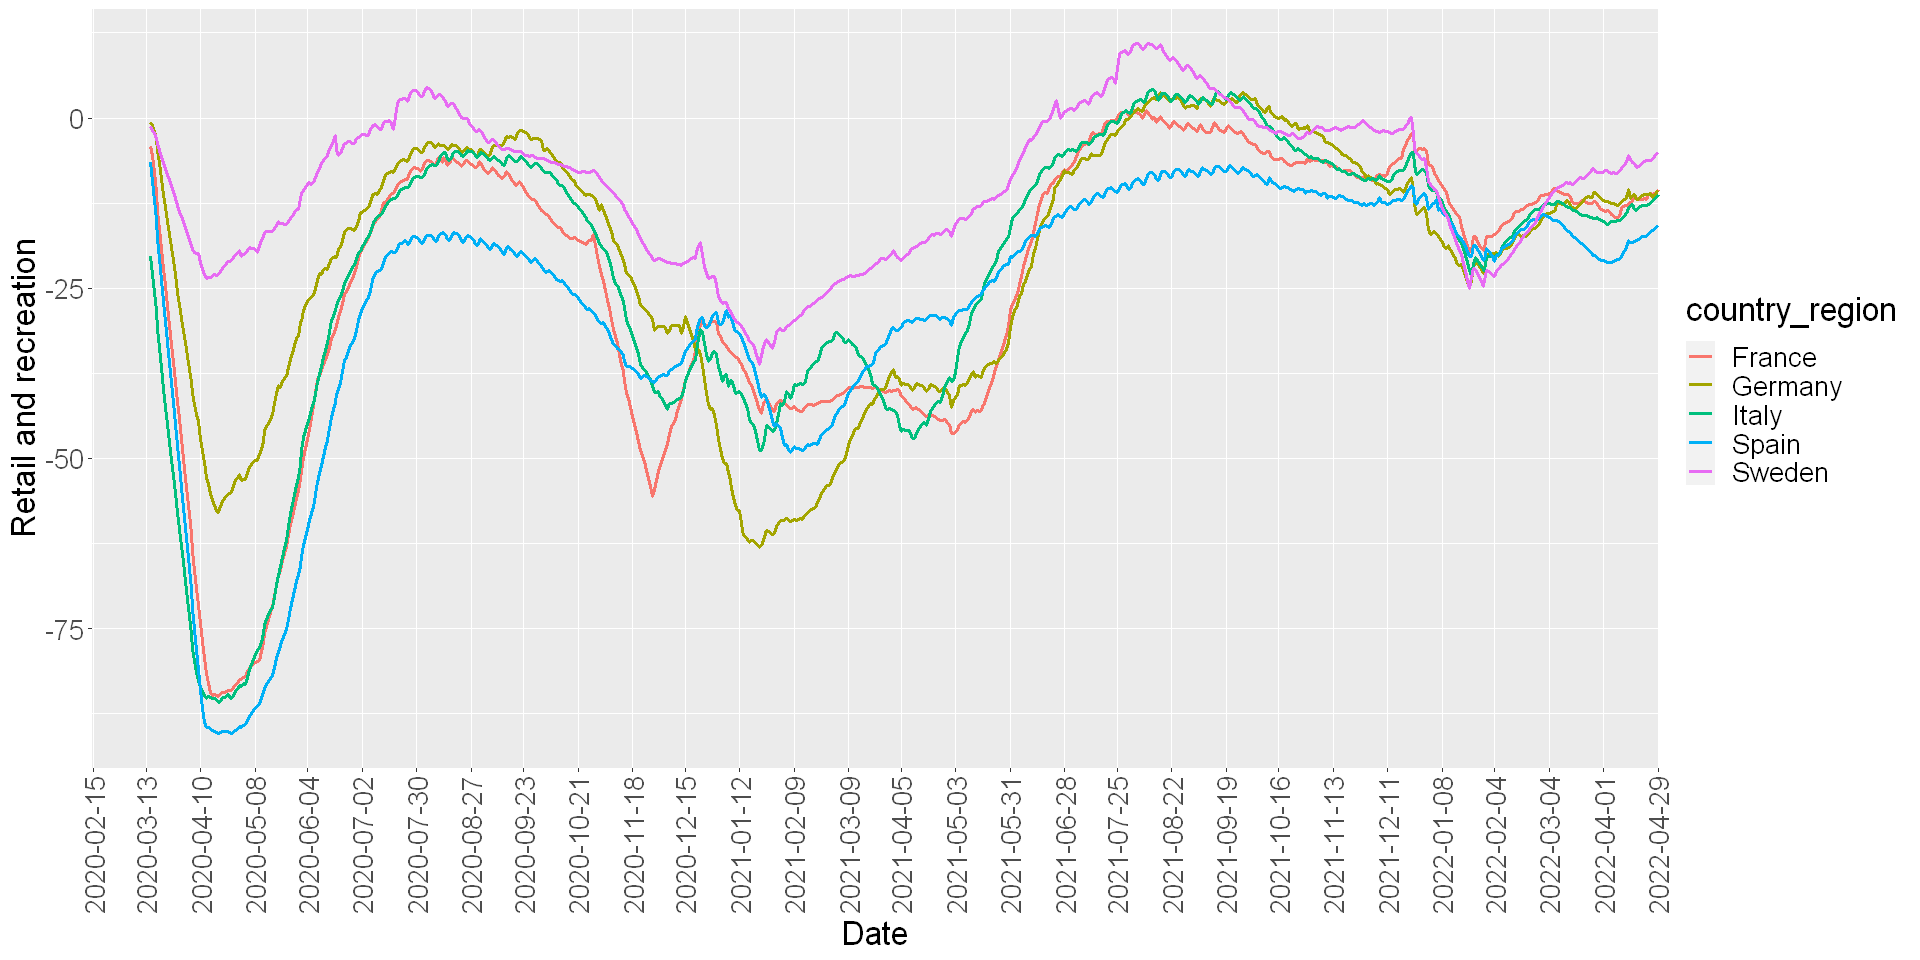

In [13]:
#Using a Moving average of months to smooth our graph
Mobility_EU %>% 
  filter(date < Sys.Date()) %>% 

  ggplot(aes(x = date,y = retail_and_recreation_percent_change_from_baseline,color=country_region))+
  geom_ma(ma_fun = SMA, n = 30,aes(group=country_region),linetype = 1,size=1) + labs(x = "Date",y="Retail and recreation")+scale_y_continuous(labels=comma)+  scale_x_discrete(breaks= Mobility_EU$date[floor(seq(1,length(Mobility_EU$date)/5, length.out = 30 ))] )+ 
  theme(text = element_text(size = 20), axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

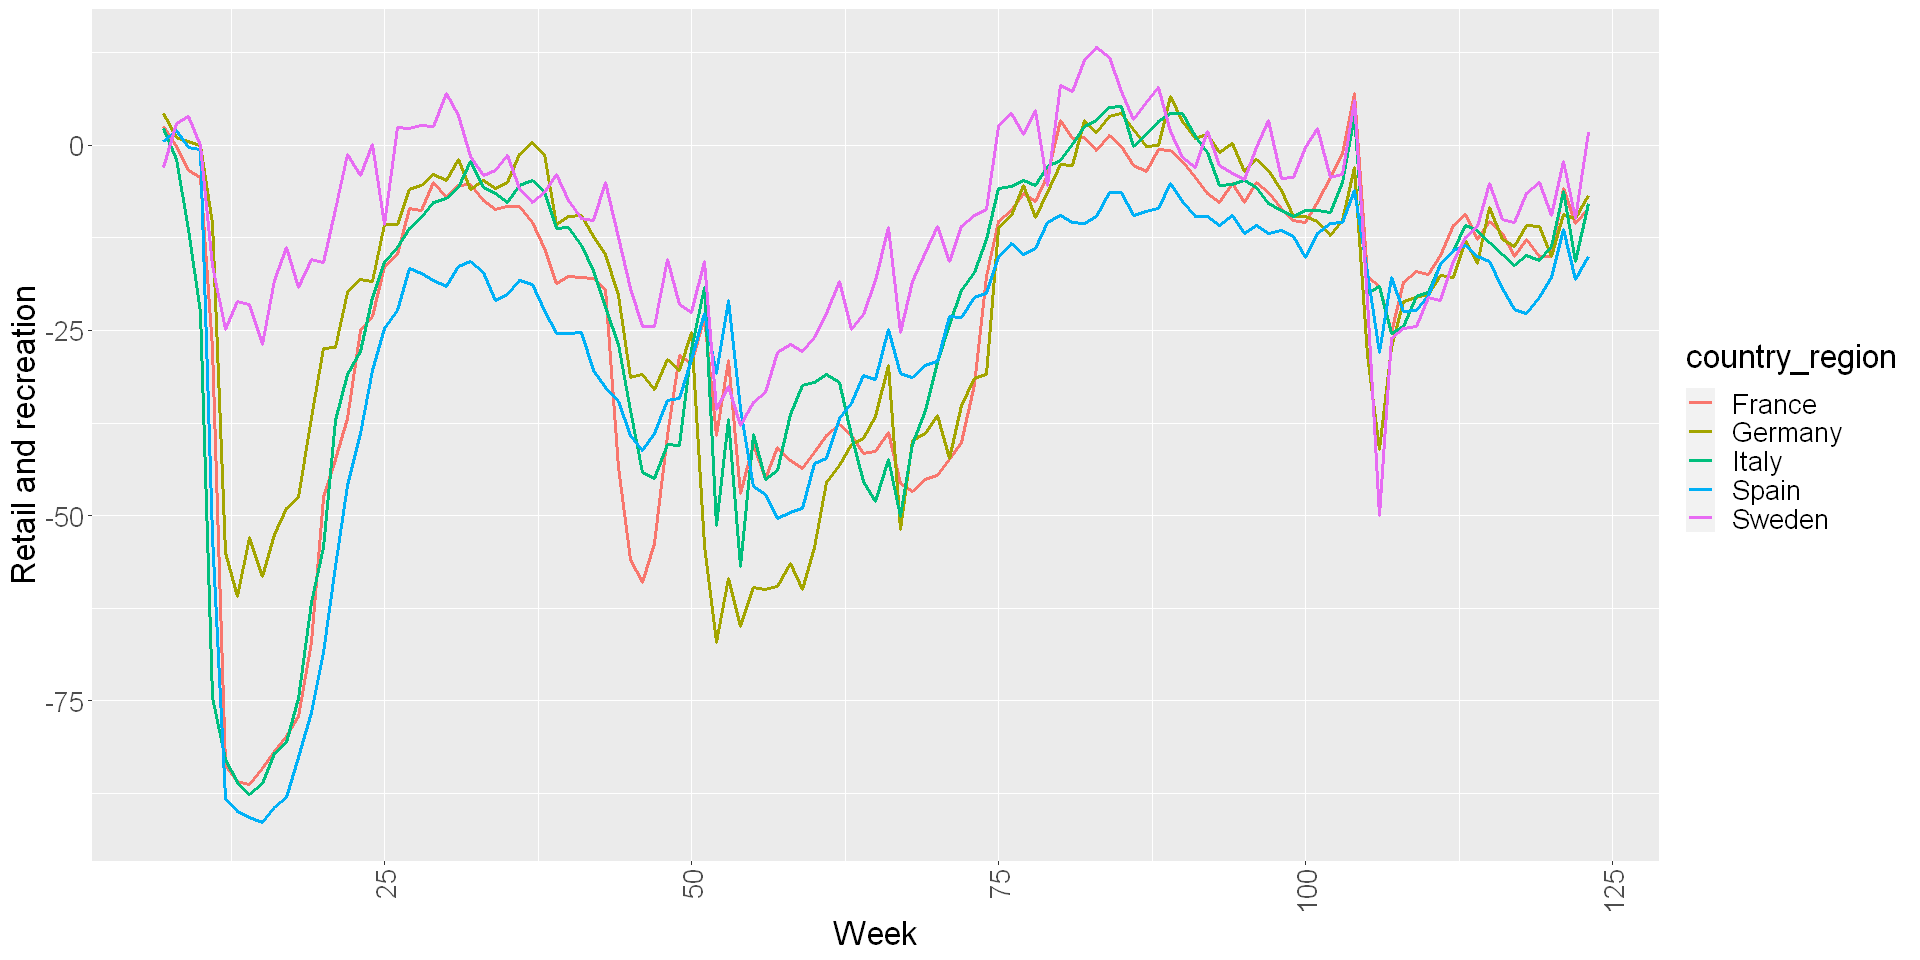

In [36]:
#Now we want to get a weekly plot using the mean of each individual week instead of using a moving average
Mobility_EU %>% 
  group_by(weeks = week(date),year = year(date),country_region,week = 53*(year(date)-2020)+week(date) ) %>% 
  summarise(value = mean(retail_and_recreation_percent_change_from_baseline),.groups = 'drop')%>%
  arrange(week) %>%
  unique()  %>%


 ggplot(aes(x = week,y = value,color=country_region))+ geom_line(size = 1)+
 theme(text = element_text(size = 20), axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ labs(x = "Week",y="Retail and recreation")


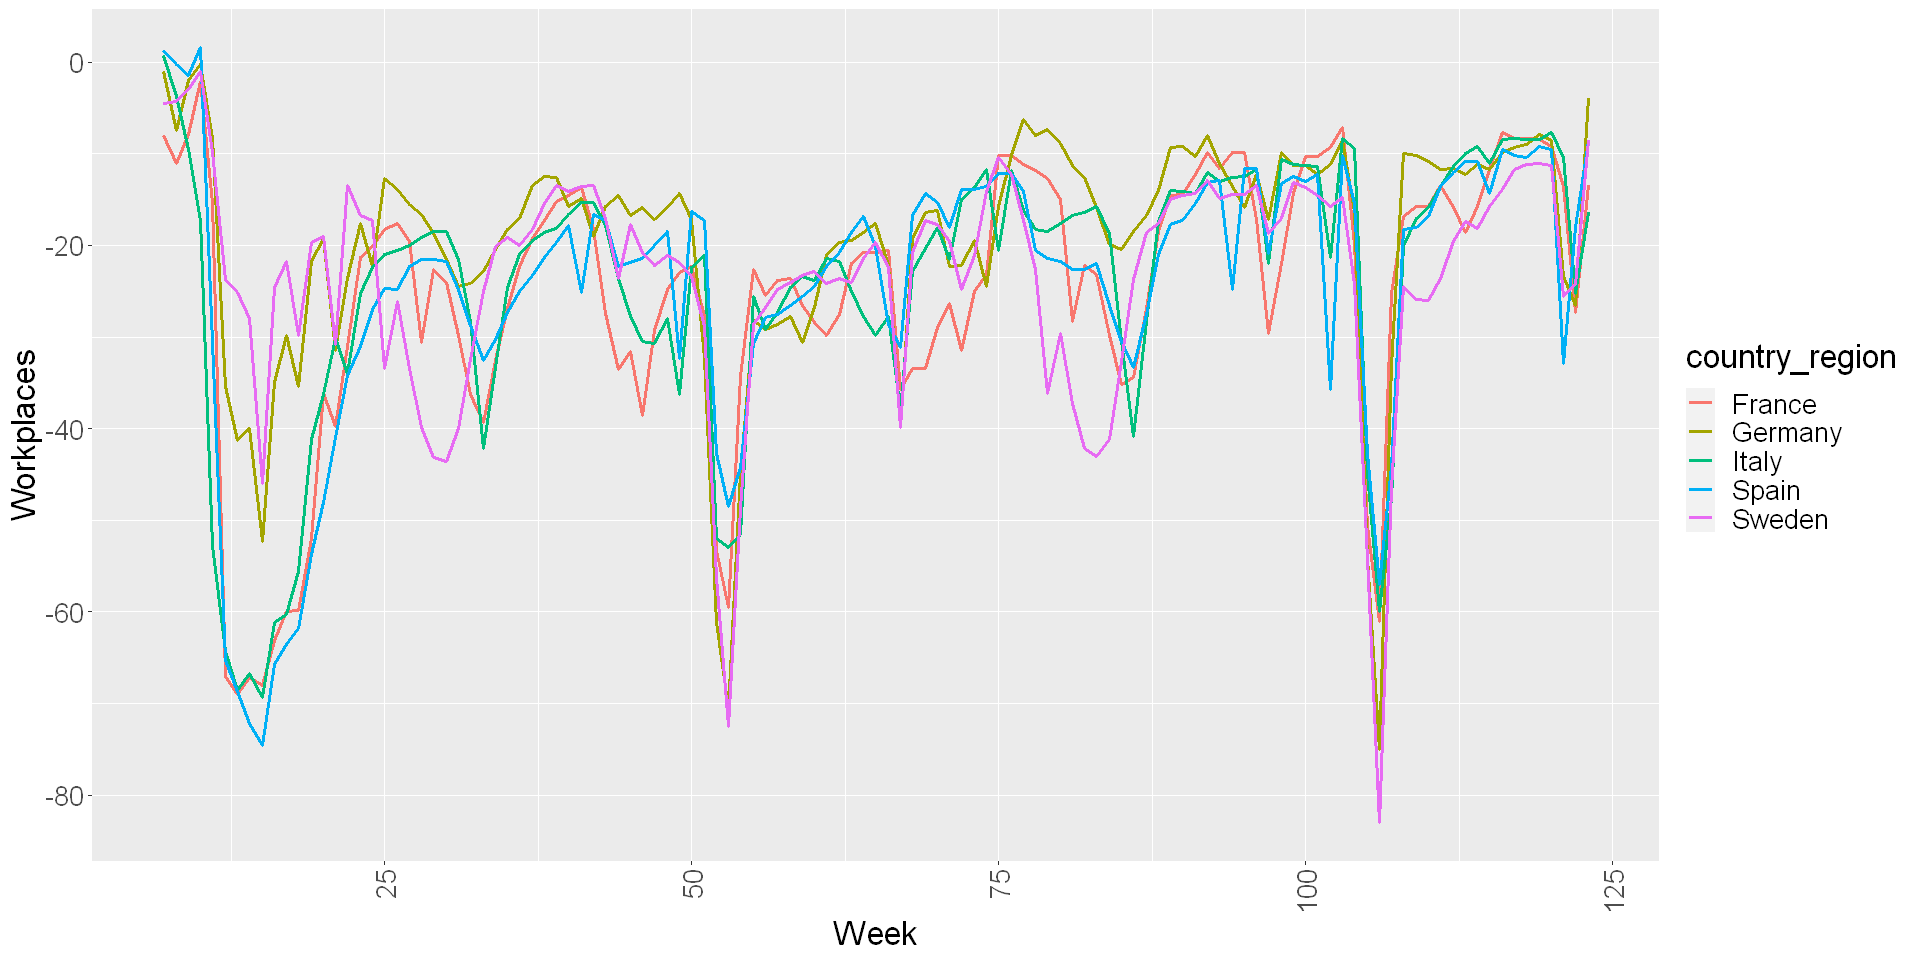

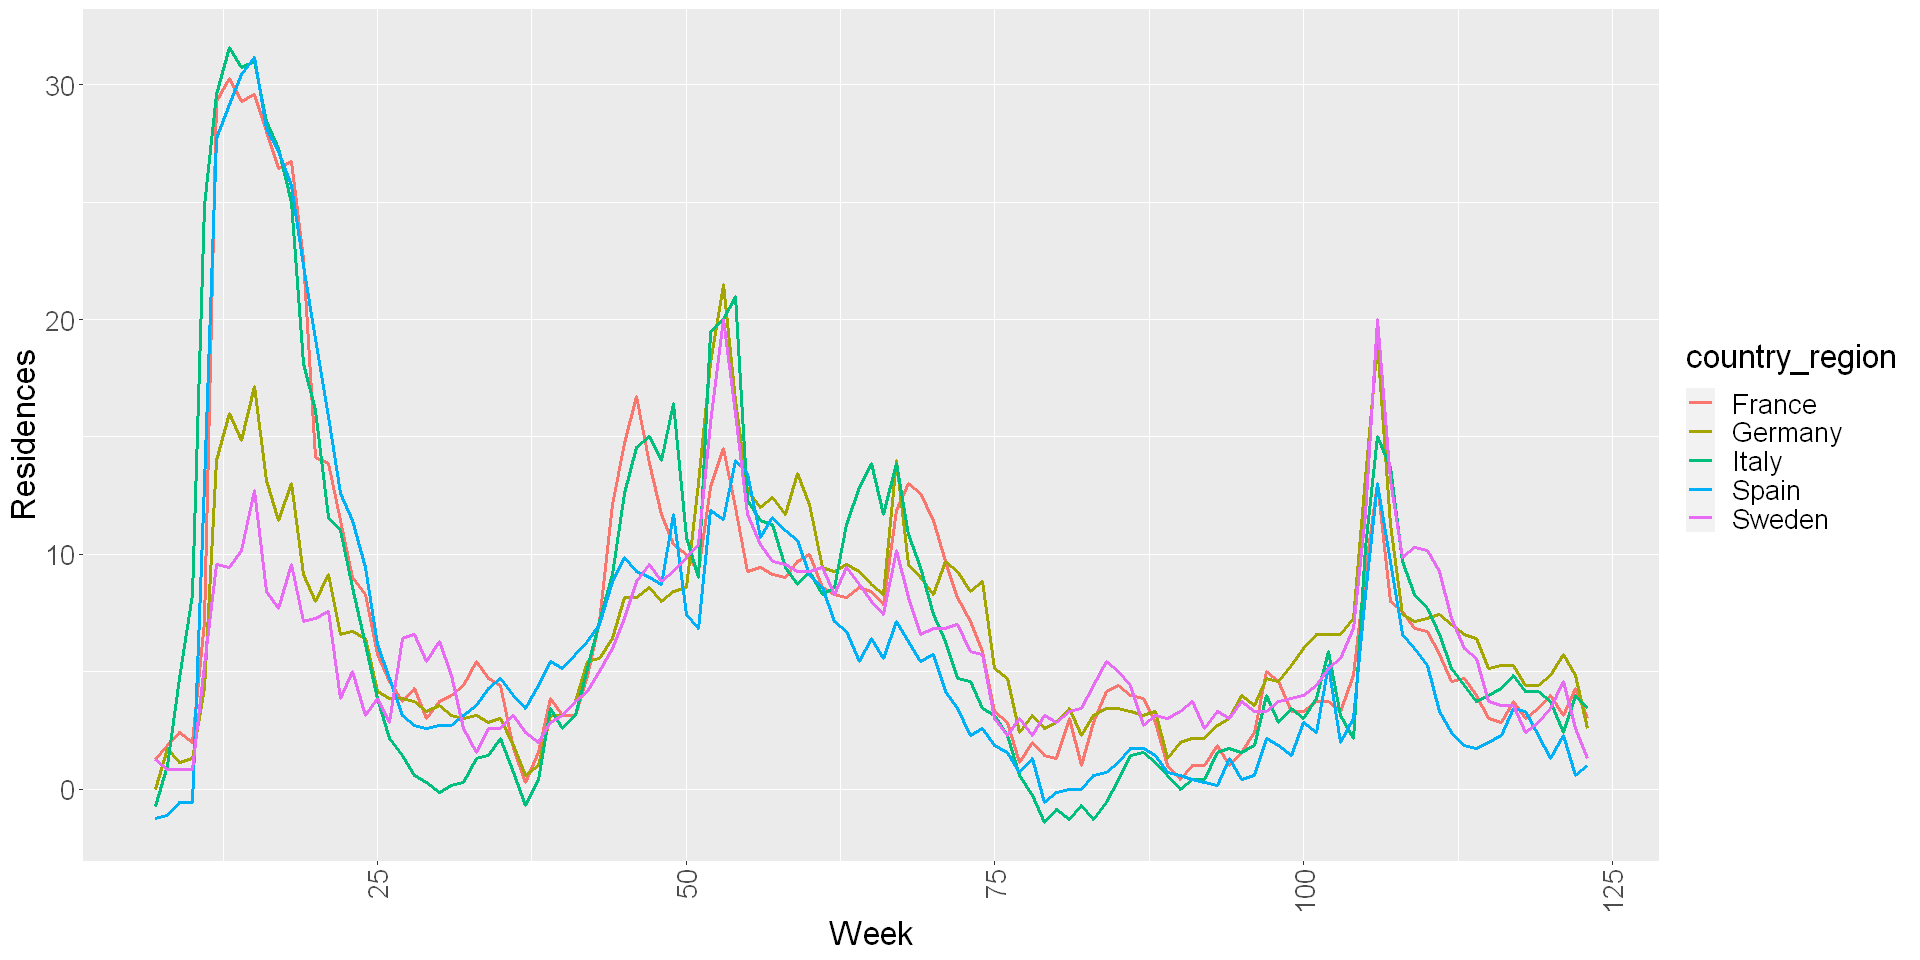

In [37]:
##Now lets generate the same kind of plots for some of the variables provided

Mobility_EU %>% 
  group_by(weeks = week(date),year = year(date),country_region,week = 53*(year(date)-2020)+week(date) ) %>% 
  summarise(value = mean(workplaces_percent_change_from_baseline),.groups = 'drop')%>%
  arrange(week) %>%
  unique()  %>%


 ggplot(aes(x = week,y = value,color=country_region))+ geom_line(size = 1)+
 theme(text = element_text(size = 20), axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ labs(x = "Week",y="Workplaces")



Mobility_EU %>% 
  group_by(weeks = week(date),year = year(date),country_region,week = 53*(year(date)-2020)+week(date) ) %>% 
  summarise(value = mean(residential_percent_change_from_baseline),.groups = 'drop')%>%
  arrange(week) %>%
  unique()  %>%


 ggplot(aes(x = week,y = value,color=country_region))+ geom_line(size = 1)+
 theme(text = element_text(size = 20), axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ labs(x = "Week",y="Residences")



### Exercise 2 - Random number generators

- one of the first random number generator was proposed by von Neumann, the so-called middle square algorithm
- write R code to implement this type of generator and, given a fixed digit number input,square it an remove the leading and trailing digits, in order to return a number with thesame number of digits as the original number
- Suggestion : after having squared the number, convert it to a list of characters (number <-unlist(strsplit(as.character(x.squared),""))) and, after having removed the head and tail of the list, convert it back to a number (as.numeric(paste(number.after.trimming, collapse="")))


In [16]:
RNG_VonNeumann <- function(num,n){
    ##Cheating for powers of 10
    if (log(num,10)%%1==0){num = num+log(num,10)**2+log(num,10)}
    generated <- vector( length = n)
    len1 <- nchar(as.character(num))
    
    for (i in 1: n){
    
    number <-unlist(strsplit(as.character(num**2),""))
    #Fixing digits to get the expected digits
    while (length(number) < 2*len1){ number<-append(number,"0") }
    #Returning the new number
    newnum <- as.numeric(paste(number[(1+floor(len1/2)):(len1*2-ceiling(len1/2))], collapse=""))
    generated[i] <- newnum
    num <- newnum

    }
return(generated)
    
}

In [17]:
RNG_VonNeumann(2322894,50)

[1] 5836535 6514080 3323824 4780598 5411723 8674582 4837287 9934552 9532344
[10] 6558213 1015775 1798850 5861322 5509558 5522935  281101 1777220 8510928
[19] 3589542 8481176 3034634 9003513 6324634   99523 4827529  503624 6371333
[28] 9388419 4241131 8719215 2471021 5944782 4043302 4829106 2026475 6600925
[37] 7221085 4406857 2038861 6954177 6057774 9662583 6551023 1590234 8844174
[46] 1941374 8933007 9861406 4732829 9967034

### Exercise 3 - Bayesian Inference

• A publishing company has recently launched a new journal. In order to determine
how effective it is in reaching its possible audience, a market survey company selects a
random sample of people from a possible target audience and interviews them. Out of
150 interviewed people, 29 have read the last issue of the journal.

- What kind of distribution would you assume for y, the number of people that have seen the last issue of the journal ?
- Assuming a uniform prior, what is the posterior distribution for y ?
- Plot both posterior and likelihood ditributions functions



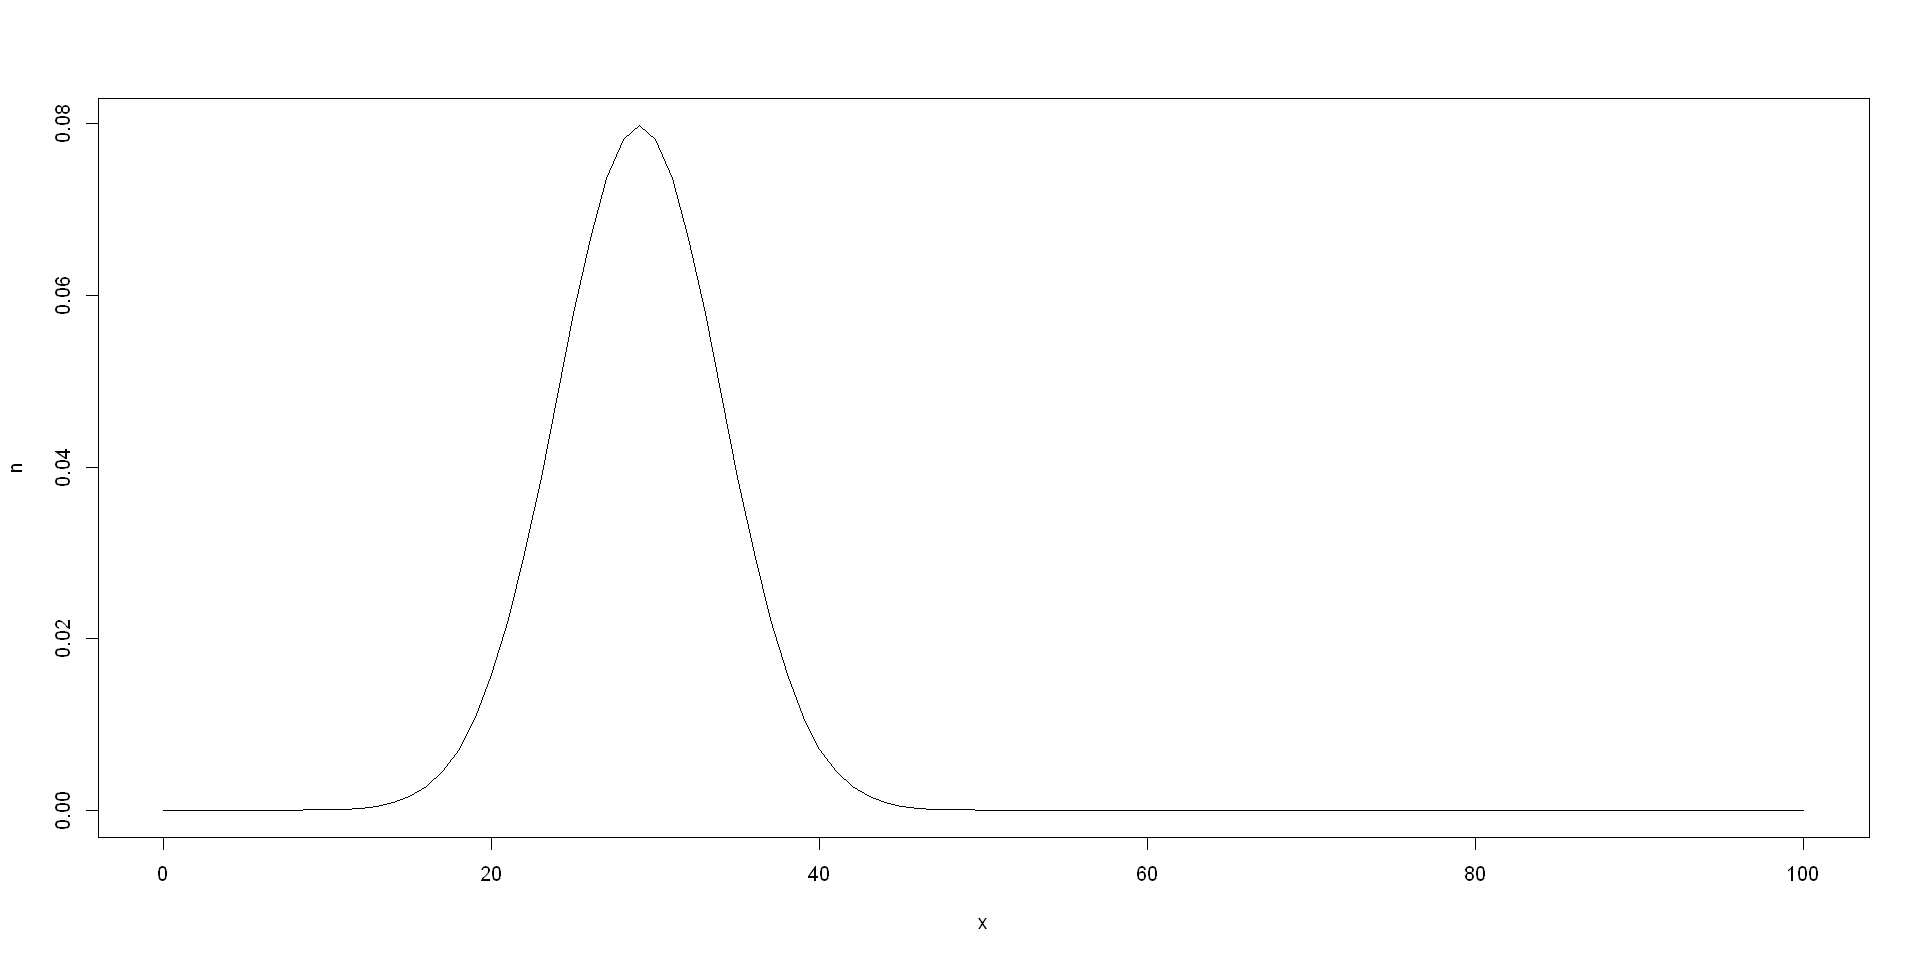

In [18]:
#I would asume a normal distribution centered at 29 with an standard deviation of 5
x <- seq(0,100,by=1)
n <- dnorm(x, 29, 5)

plot(x,n,type="l")

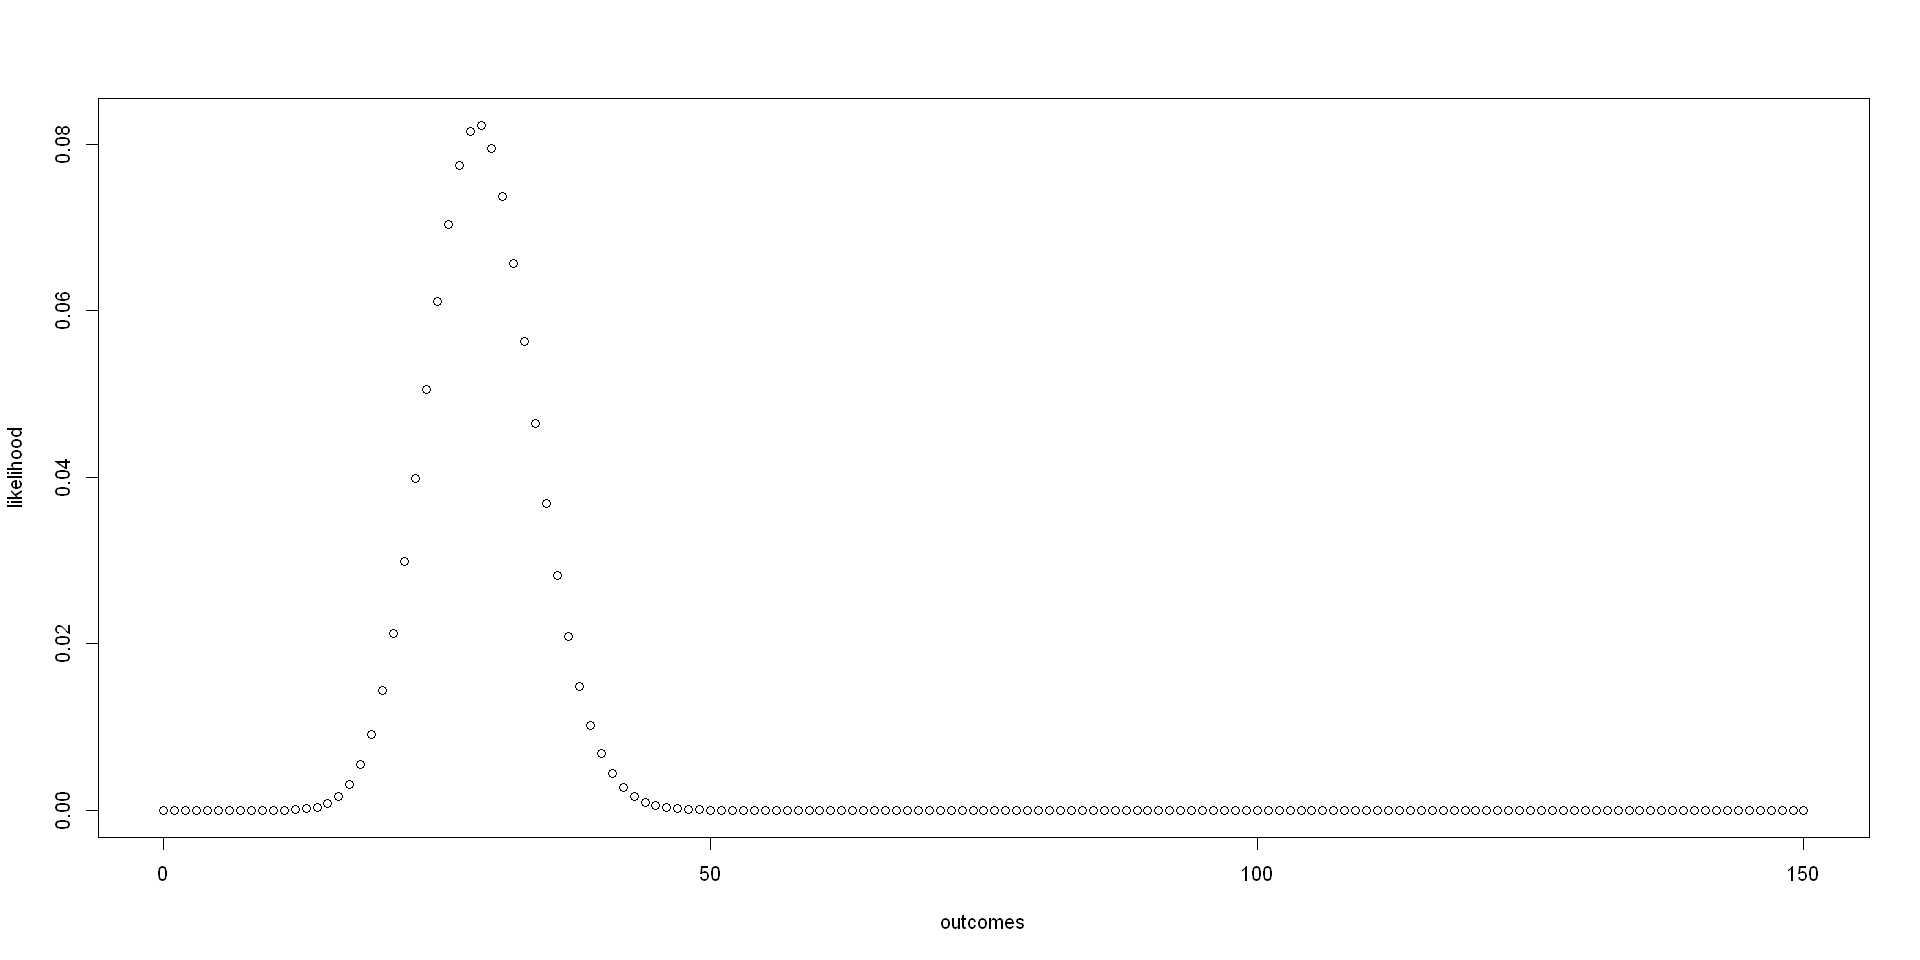

In [39]:
##Likelihood for the poll results
n <- 150
r <- 29
outcomes <- seq(0,150,length.out = 151)
likelihood <- dbinom(x=outcomes, size=n, r/n)
plot(outcomes,likelihood)

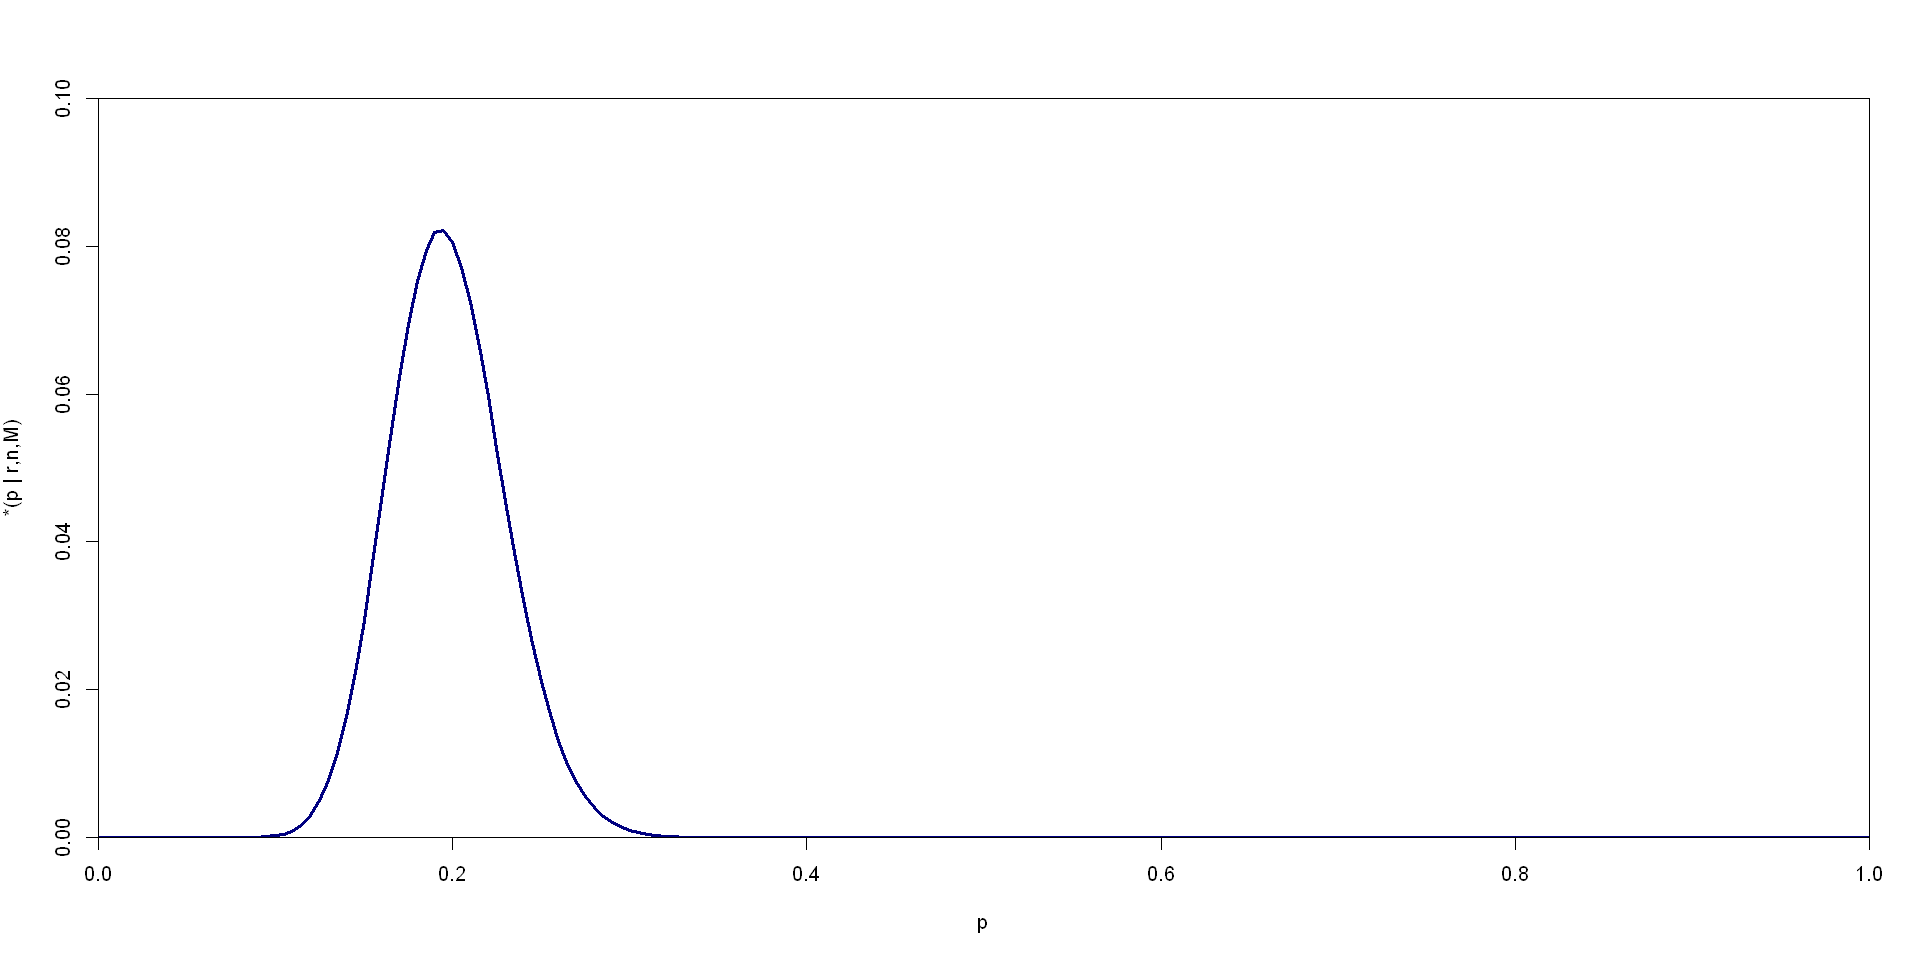

In [19]:
#Now lets plot the posterior distribution as indicated in the slides
n <- 150
r <- 29
p <- seq(0, 1, length.out = 201)
p.post <- dbinom(x=r, size=n, prob=p)
plot(p, p.post ,
xaxs="i", yaxs="i", col="navy",
type="l", lty=1, lwd = 3,
ylim=c(0,0.1),
xlab="p",
ylab=expression(paste("*","(p | r,n,M)")))
#lines(p, dunif(p, min = 0, max =0.8, log = FALSE), type = "l", lty = 1)

### Exercise 4: 

A coin is flipped n = 30 times with the following outcomes:
T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H,
T, H, H, H

- Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the data set.
- Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval.
- Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30).
- Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole) ?


In [20]:
#Take the experimental results
n <- 30
r <- 15
p <- seq(-1, 31, length.out = 300)

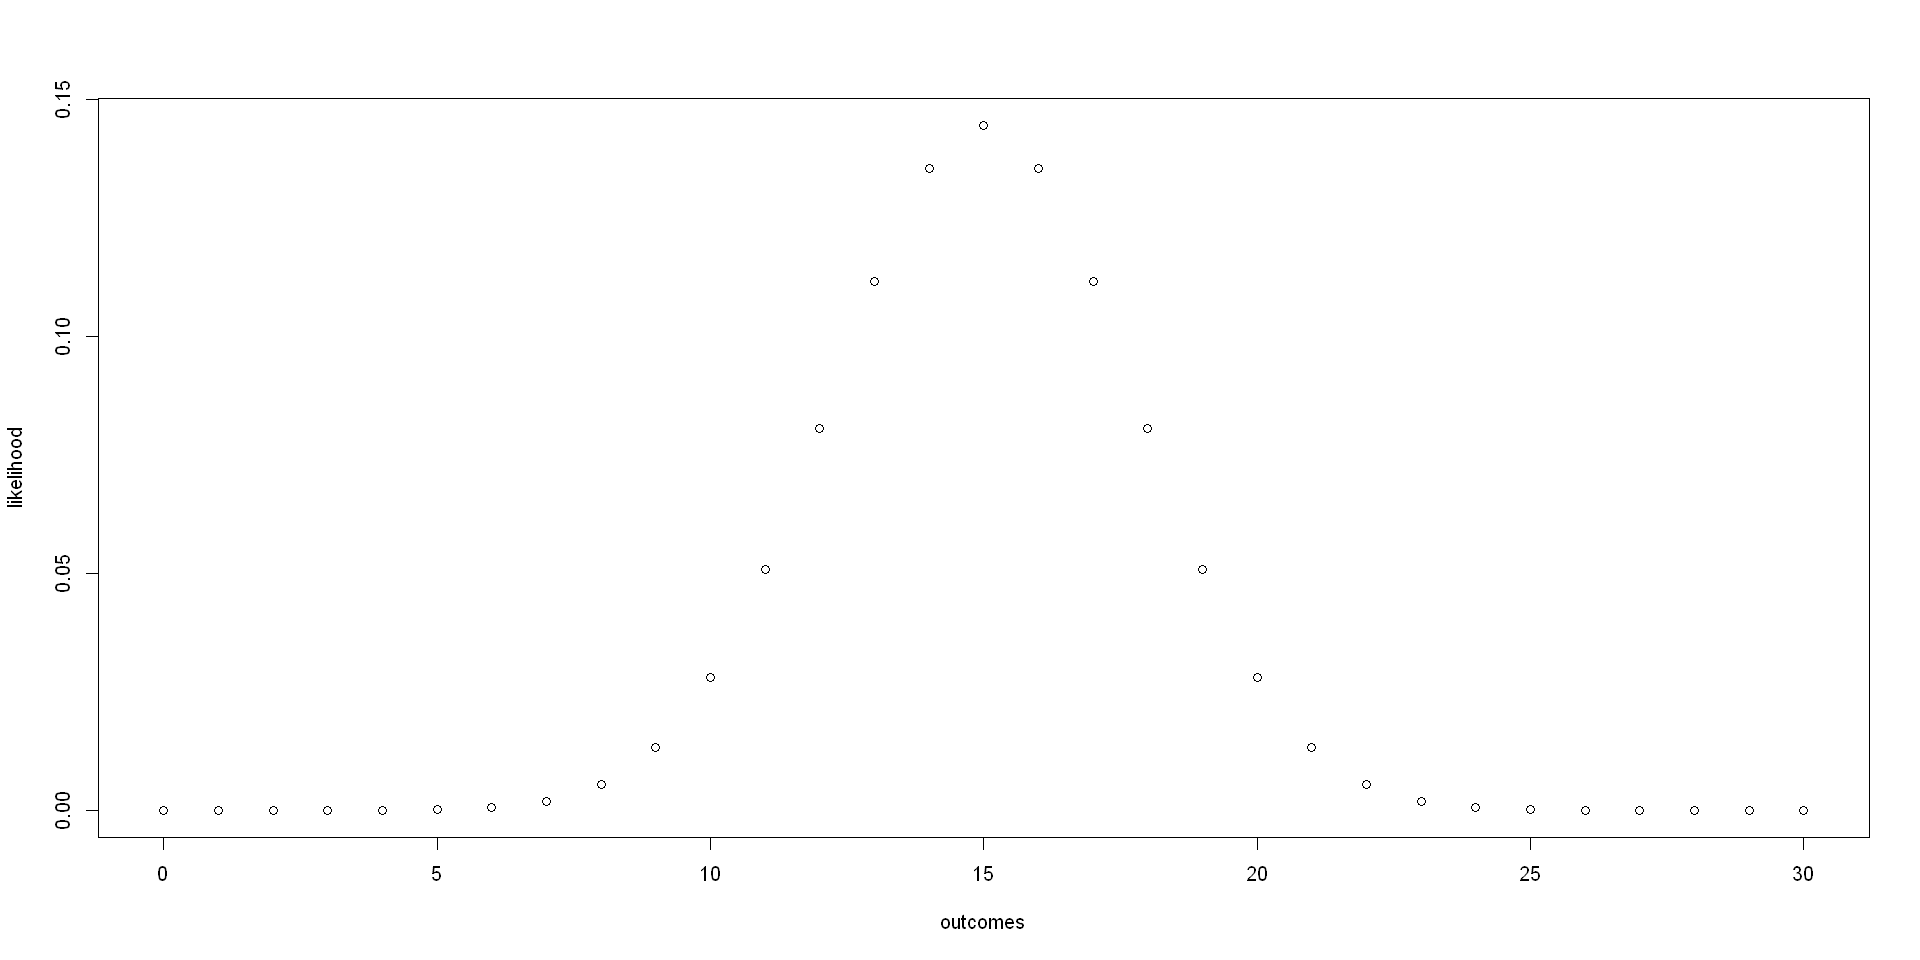

In [21]:
##Likelihood for the coin toss problem
outcomes <- seq(0,30,length.out = 31)
likelihood <- dbinom(x=outcomes, size=n, 0.5)
plot(outcomes,likelihood)

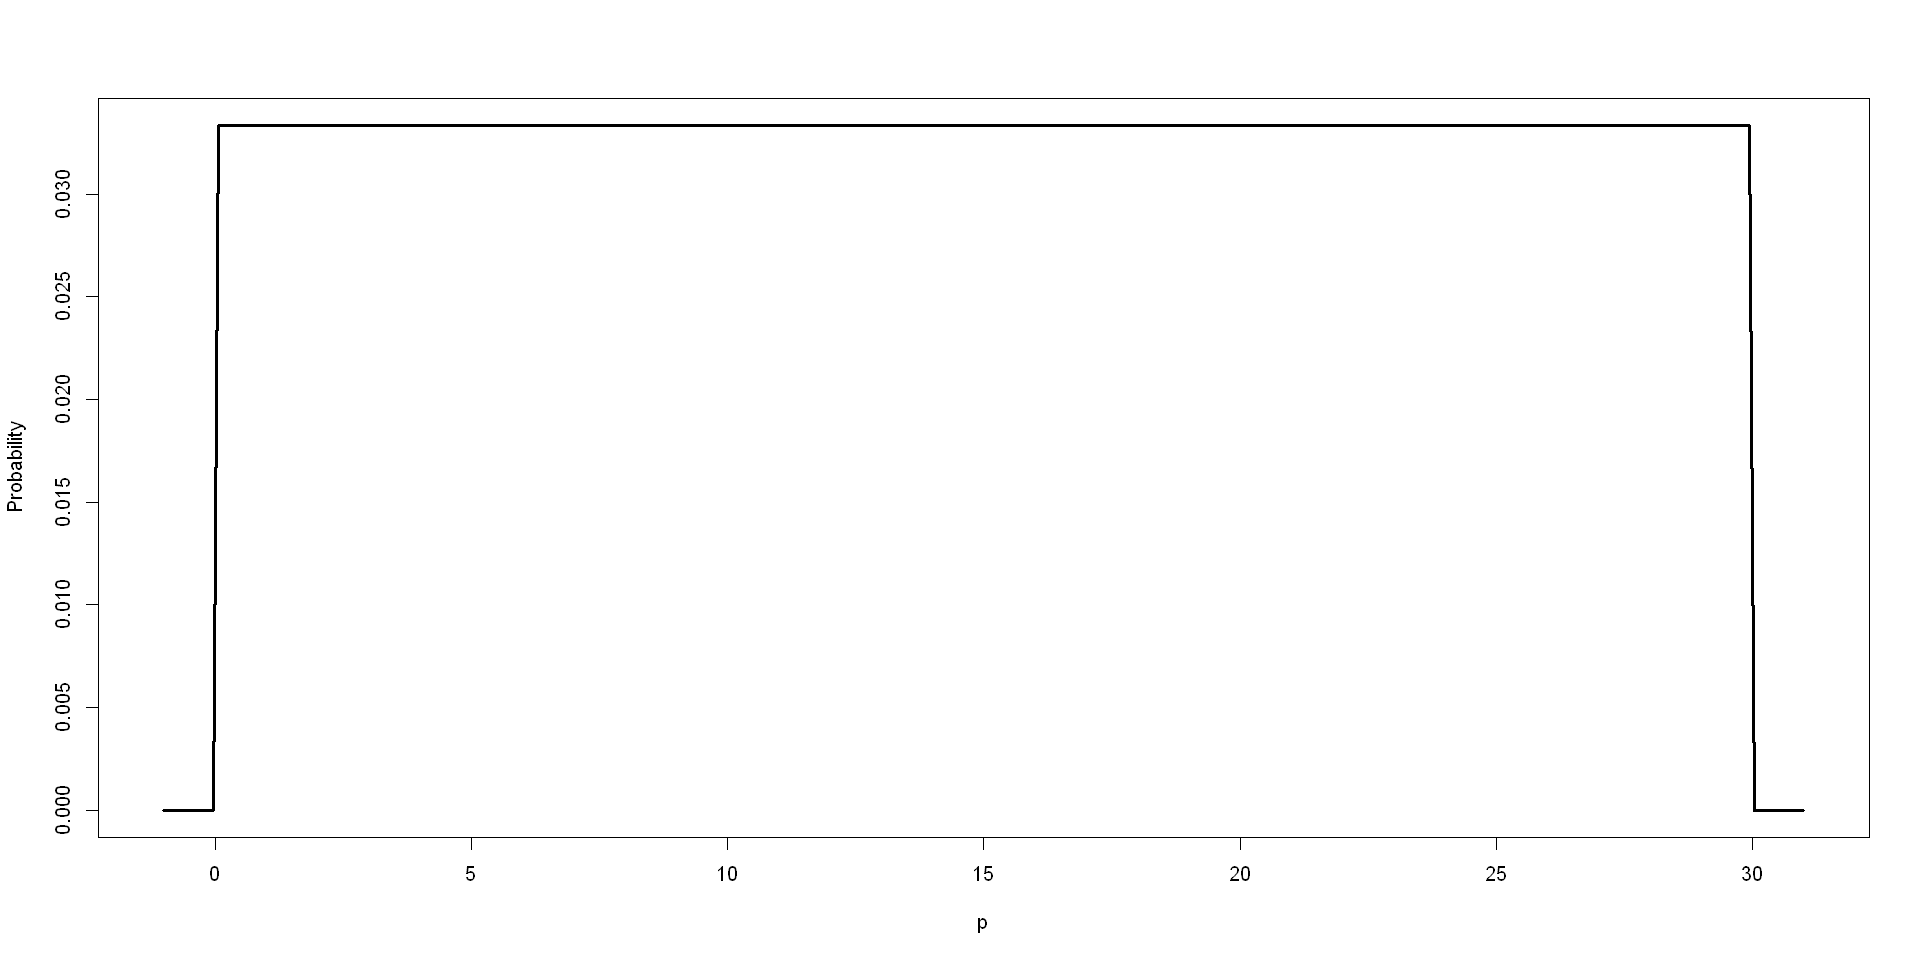

In [22]:
#We plot a uniform prior where the number of heads from 30 tosses has an equal probability
plot(p, dunif(p, min = 0, max =30, log = FALSE), type = "l", lty =1,lwd = 3,ylab ="Probability")

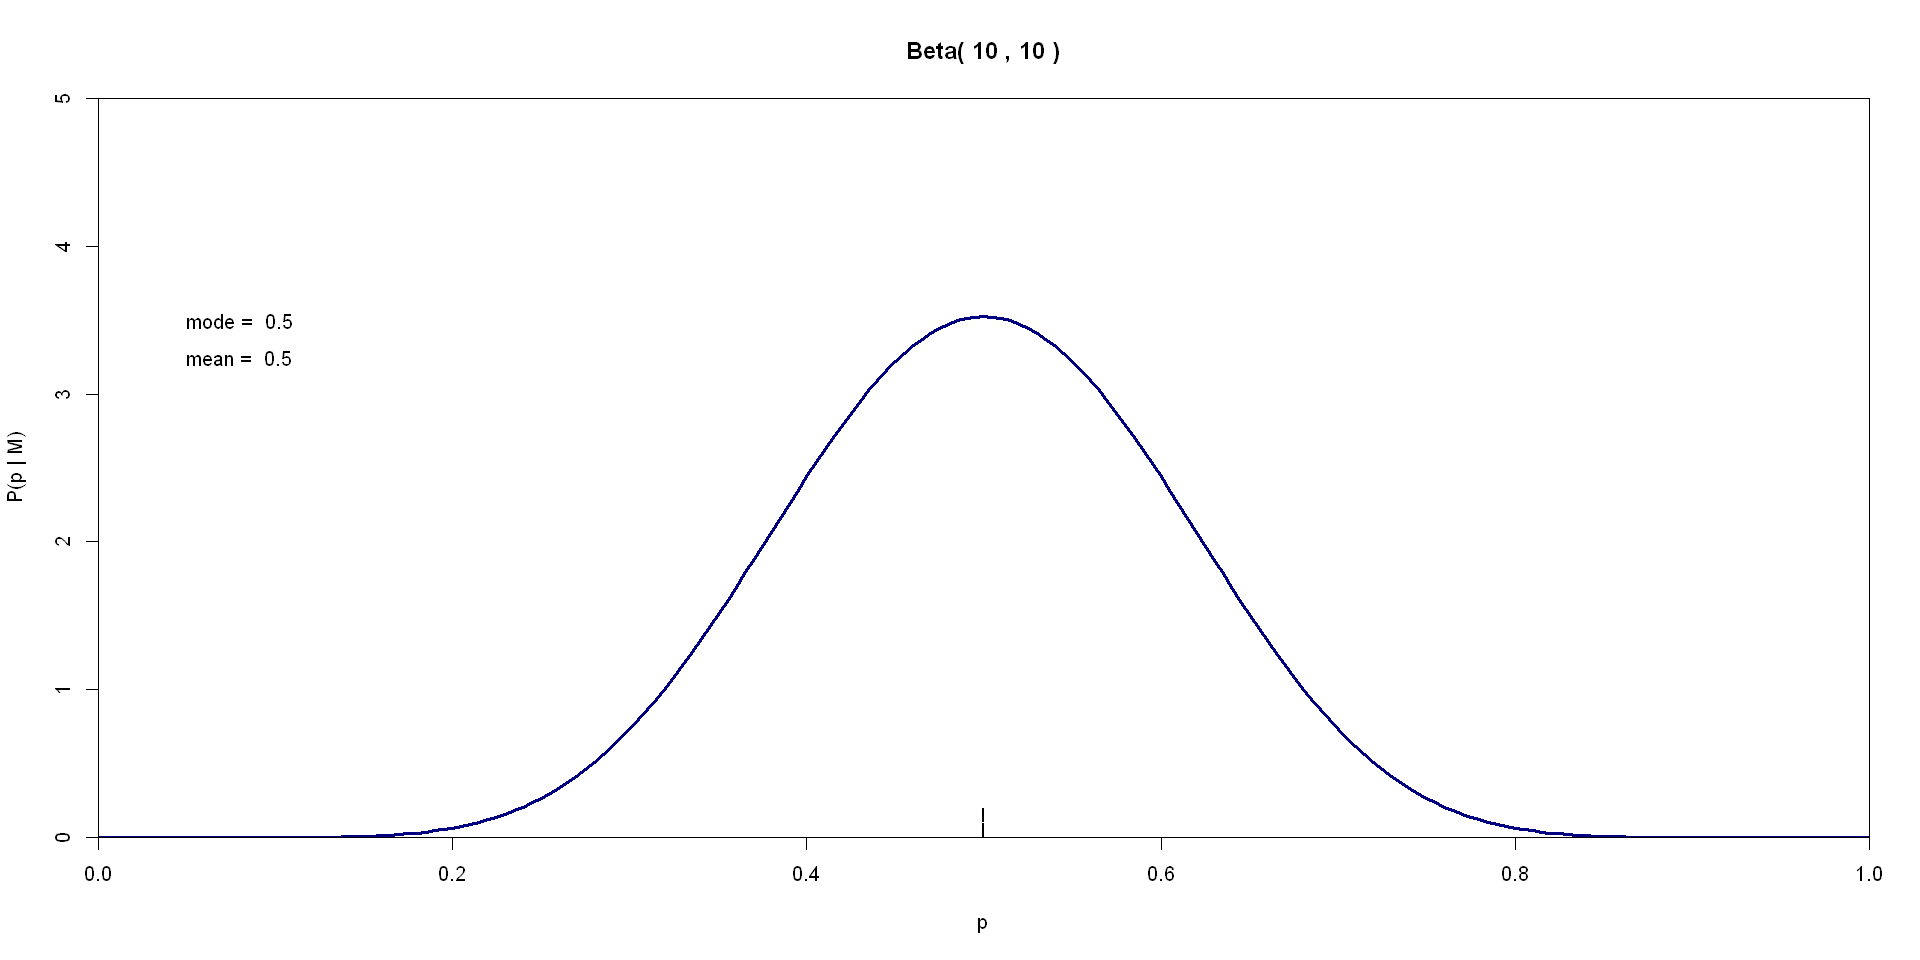

In [23]:
#We plot the beta distributuion for our coin toss
alpha <- 10; beta <- 10
p <- seq(0, 1, length.out = 201)
p.prior <- dbeta(p, alpha , beta)
plot(p, p.prior , xaxs="i", yaxs="i",
col="navy", type="l", lty=1, lwd = 3,
ylim=c(0,5),
xlab="p", ylab=paste("P(p | M)"),
main=paste("Beta(",alpha ,",",beta ,")"))
mode <- (alpha - 1)/( alpha + beta - 2)
lines(c(mode , mode), c(0, 0.2), lty=5, lwd=2)
mean <- alpha /( alpha + beta)
lines(c(mean , mean), c(0, 0.2), lty=2, lwd=2)
text(0.05, 3.5, adj=0, paste("mode = ", mode))
text(0.05, 3.25, adj=0, paste("mean = ", mean))

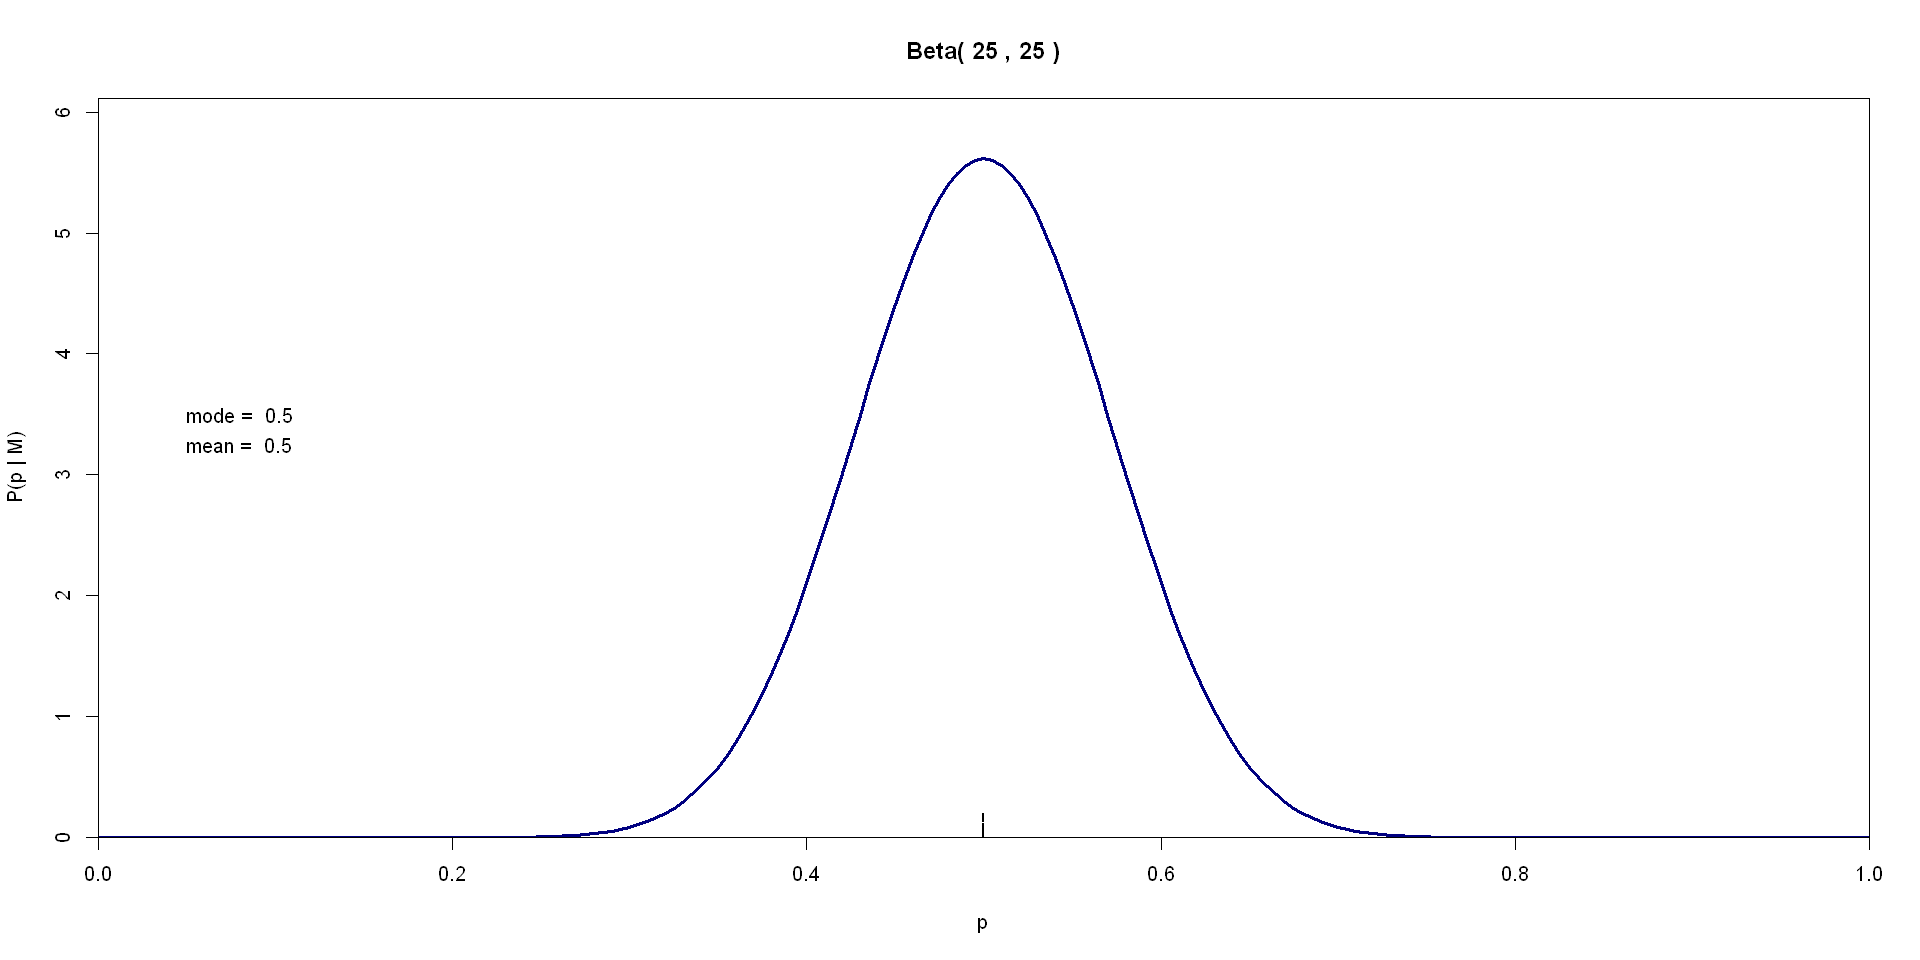

In [24]:
#Now we need to get our new alpha and beta from the number of attempts:
alpha <- 10+r; beta <- 10+n-r

p <- seq(0, 1, length.out = 201)
p.prior <- dbeta(p, alpha , beta)
plot(p, p.prior , xaxs="i", yaxs="i",
col="navy", type="l", lty=1, lwd = 3,
ylim=c(0,max(p.prior)+0.5),
xlab="p", ylab=paste("P(p | M)"),
main=paste("Beta(",alpha ,",",beta ,")"))
mode <- (alpha - 1)/( alpha + beta - 2)
lines(c(mode , mode), c(0, 0.2), lty=5, lwd=2)
mean <- alpha /( alpha + beta)
lines(c(mean , mean), c(0, 0.2), lty=2, lwd=2)
text(0.05, 3.5, adj=0, paste("mode = ", mode))
text(0.05, 3.25, adj=0, paste("mean = ", mean))

In [25]:
#Getting the confidence interval for our symetric posterior
alpha_conf <- 0.05
q_lower <- qbeta(alpha_conf / 2, alpha , beta)
q_upper <- qbeta(1 - alpha_conf / 2, alpha , beta)
c(q_lower, q_upper)

[1] 0.3633783 0.6366217

In [26]:
#Now lets do a function that flips n number of coins and returns R and then gives us our alpha and beta so we can plot it

coins <- function(n,p = 0.5){
    r <- 0
    for (n in seq(1:n)){
       
    if (runif(1,0,1) < p){
        r <- r+1
    }
                
    }
  
  return(r)  
}

#Now lets make the plot a function too

coinplot <- function(n, r,conf=0.05,plotting = TRUE){
    
    
alpha <- 10+r; beta <- 10+n-r
    
p <- seq(0, 1, length.out = 201)
p.prior <- dbeta(p, alpha , beta)
mode <- (alpha - 1)/( alpha + beta - 2)
mean <- alpha /( alpha + beta)
if (plotting == TRUE){
    
plot(p, p.prior , xaxs="i", yaxs="i",
col="navy", type="l", lty=1, lwd = 3,
ylim=c(0,max(p.prior)+0.5),
xlab="p", ylab=paste("P(p | M)"),
main=paste("Beta(",alpha ,",",beta ,")"))

lines(c(mode , mode), c(0, 0.2), lty=5, lwd=2)

lines(c(mean , mean), c(0, 0.2), lty=2, lwd=2)
text(0.05, 3.5, adj=0, paste("mode = ", mode))
text(0.05, 3.25, adj=0, paste("mean = ", mean)) 
    
}
#reliability  <-  (1/(alpha+beta+n-1))*sqrt((alpha+r-1)/(alpha+r)) 

q_lower <- qbeta(conf / 2, alpha , beta)
q_upper <- qbeta(1 - conf / 2, alpha , beta)
 
    
return(c(q_lower, q_upper,mode,mean) )
}


In [27]:
#We can also set p = 1 to say it is not a fair coin
coins(10,p=1)

[1] 10

The confidence interval is: 0.3152781 0.7280422

character(0)

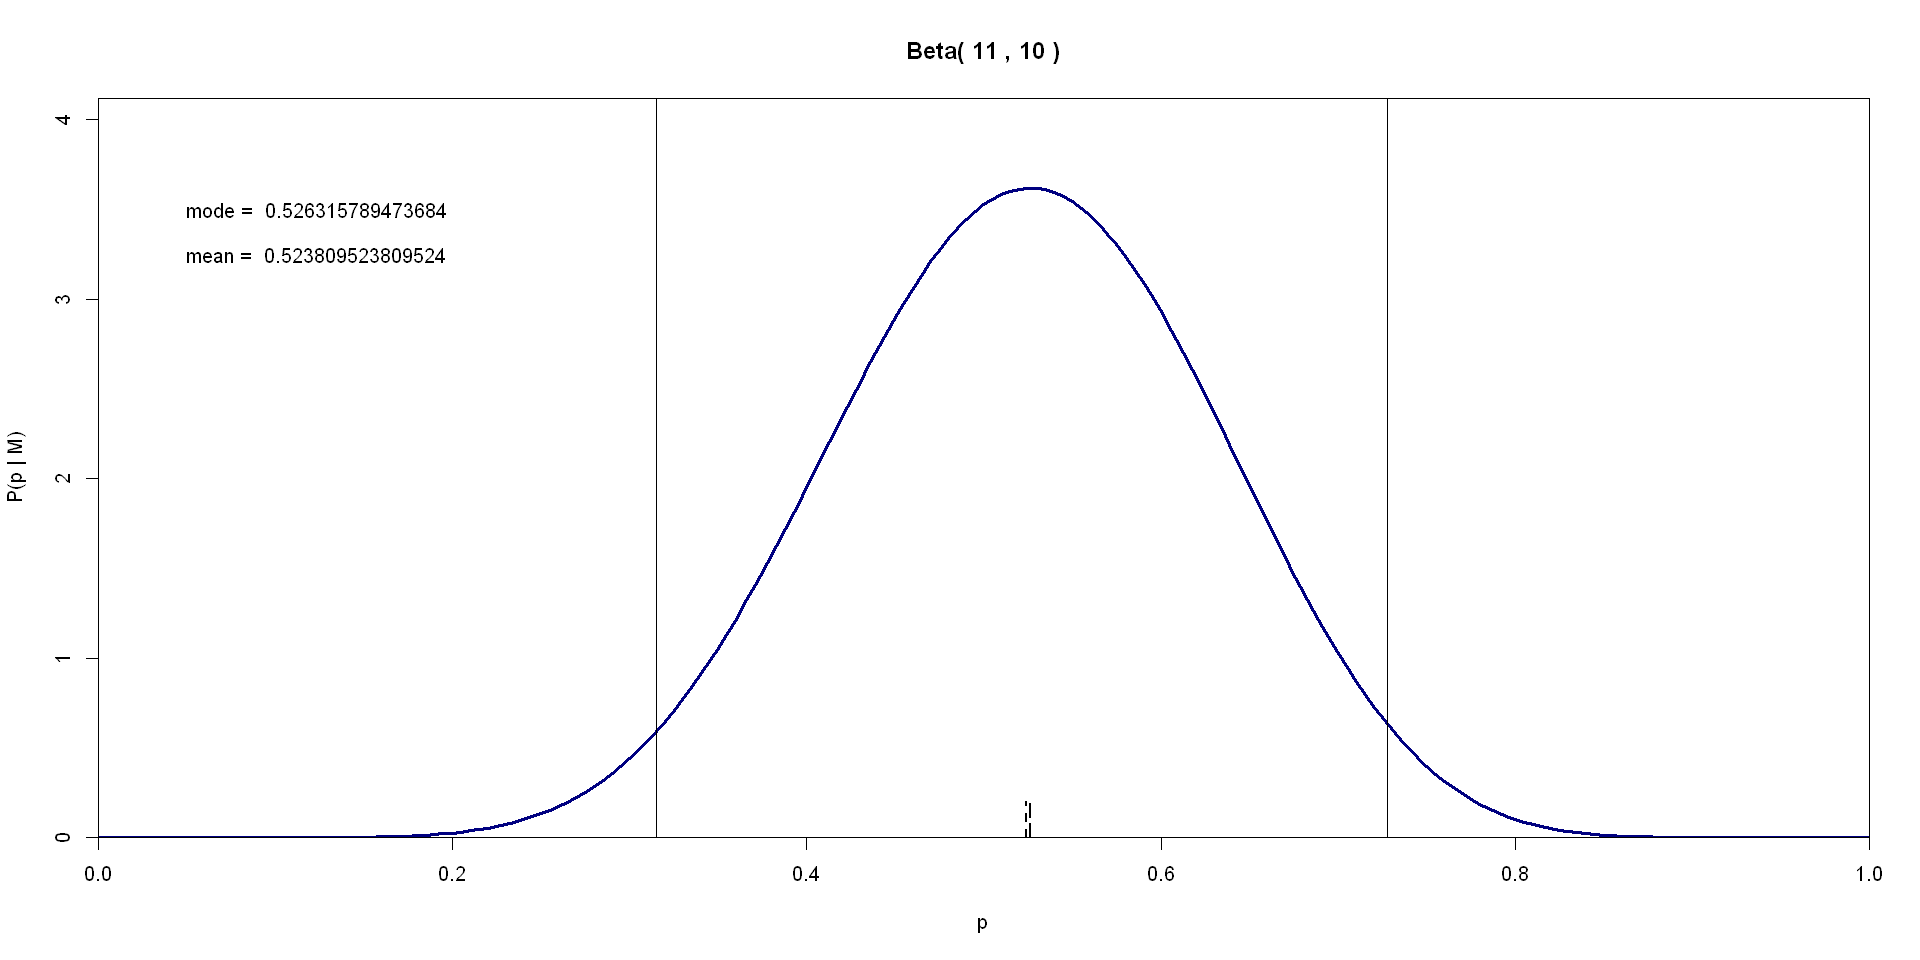

In [28]:
#Now we put all together choosing our parameters and see the result

n <- 1
prob <- 0.5
r <- coins(n,prob)
output <-coinplot(n,r)
paste(cat("The confidence interval is:",output[1:2]))
abline(v = output[1])
abline(v = output[2])
#We can also see that the confidence interval is really big for only one flip, meaning we have great uncertainty

In [29]:
#Now we can do some plots to see how the distribution varies with different amount of tries to achieve that 
#I want to do a dataframe as a result to check the evolution
tries <- data.frame(matrix(ncol = 7, nrow = 0))

colnames(tries) <- c("Flips", "Probability", "Heads", "Confidence_interval","Confidence_Size", "Mode","Mean")


for (n in seq(1:100)){
    
    prob <- 0.5
    r <- coins(n,prob)
    output <-coinplot(n,r,0.05,FALSE)
 #   paste(cat("The confidence interval is:",output))
    tries[n,] <- list(n,prob,r,paste("[",round(output[1],3),"-",round(output[2],3),"]"), round(output[2]-output[1],3),round(output[3],3),round(output[4],3))
}



In [30]:
#Now we have our dataframe with the important information of all the tries
tries



,Flips,Probability,Heads,Confidence_interval,Confidence_Size,Mode,Mean
,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,1,0.5,1,[ 0.315 - 0.728 ],0.413,0.526,0.524
2,2,0.5,1,[ 0.298 - 0.702 ],0.404,0.500,0.500
3,3,0.5,2,[ 0.322 - 0.718 ],0.396,0.524,0.522
4,4,0.5,2,[ 0.306 - 0.694 ],0.388,0.500,0.500
5,5,0.5,3,[ 0.328 - 0.709 ],0.381,0.522,0.520
6,6,0.5,3,[ 0.313 - 0.687 ],0.374,0.500,0.500
7,7,0.5,5,[ 0.369 - 0.734 ],0.365,0.560,0.556
8,8,0.5,5,[ 0.353 - 0.713 ],0.360,0.538,0.536
9,9,0.5,8,[ 0.441 - 0.785 ],0.344,0.630,0.621


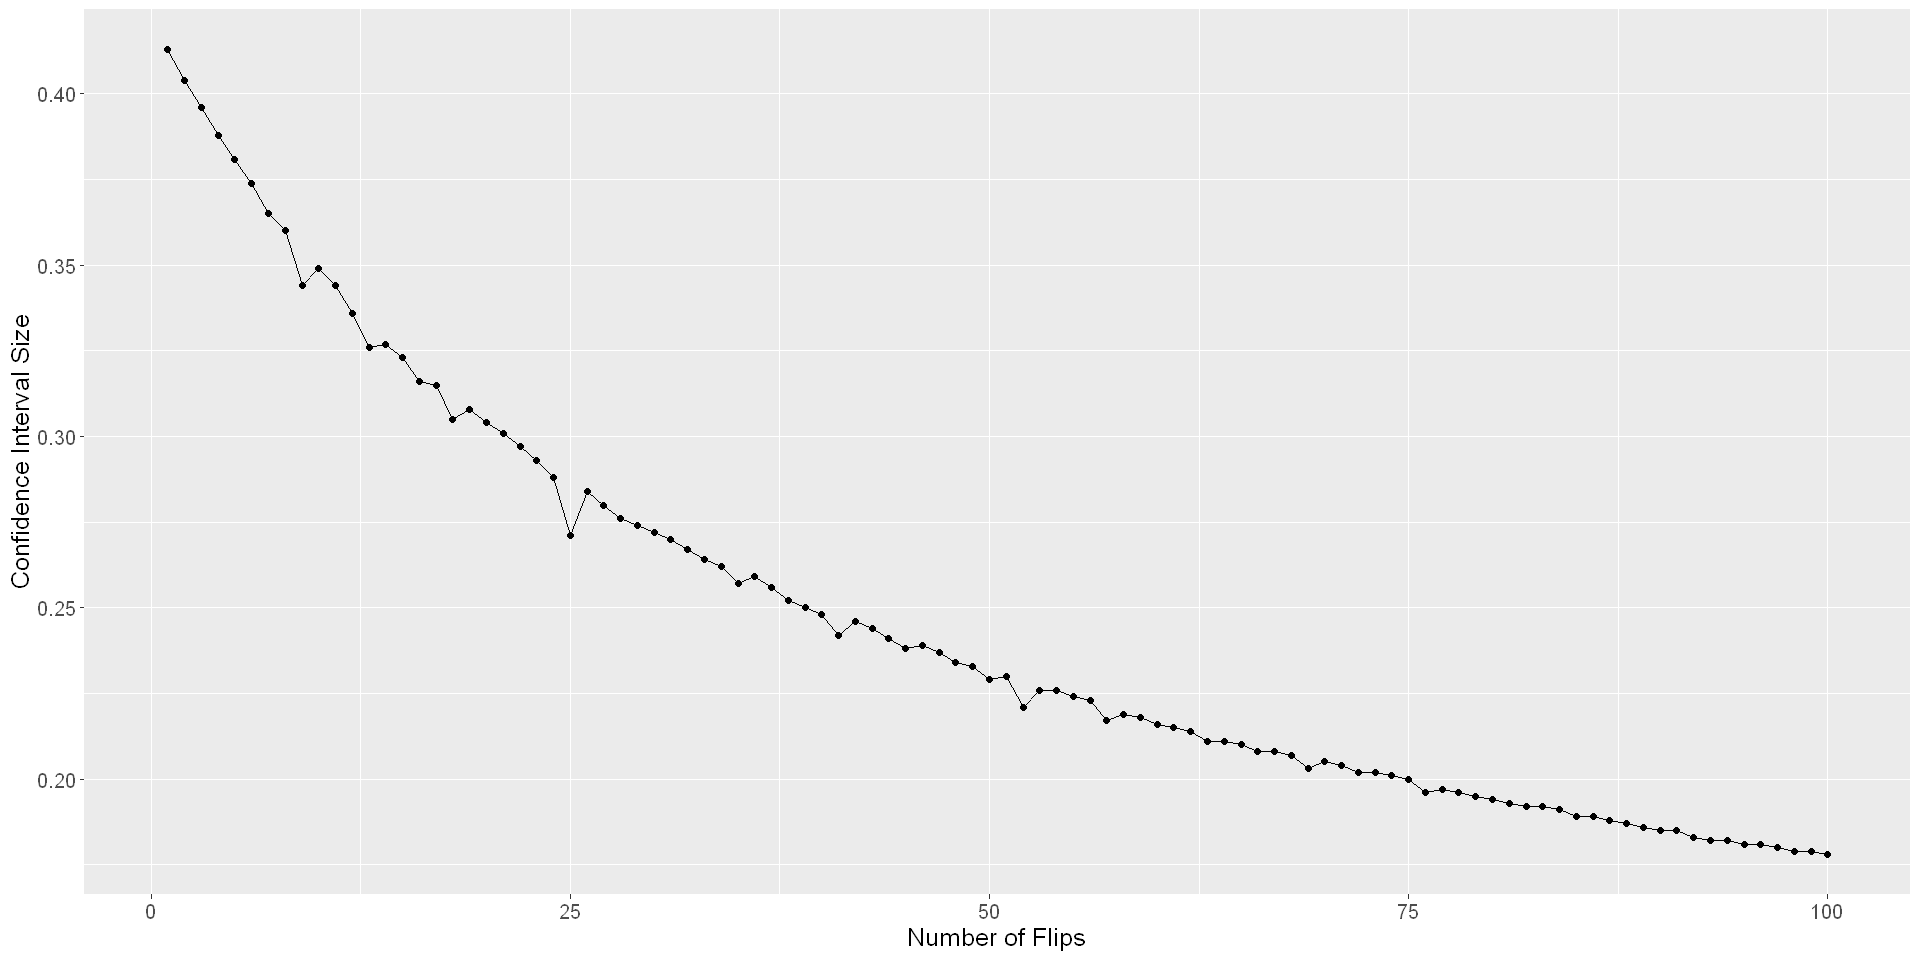

In [31]:
options(repr.plot.width=16, repr.plot.height=8)

tries %>%
arrange(Flips) %>%

ggplot(aes(x = Flips,y = Confidence_Size,group=1))+
  geom_point()+geom_line()+ theme(text = element_text(size = 15))+ labs(x = "Number of Flips",y="Confidence Interval Size")
  #We can see that as the number of tries increases we find our value with 95% chance in a smaller and smaller interval.

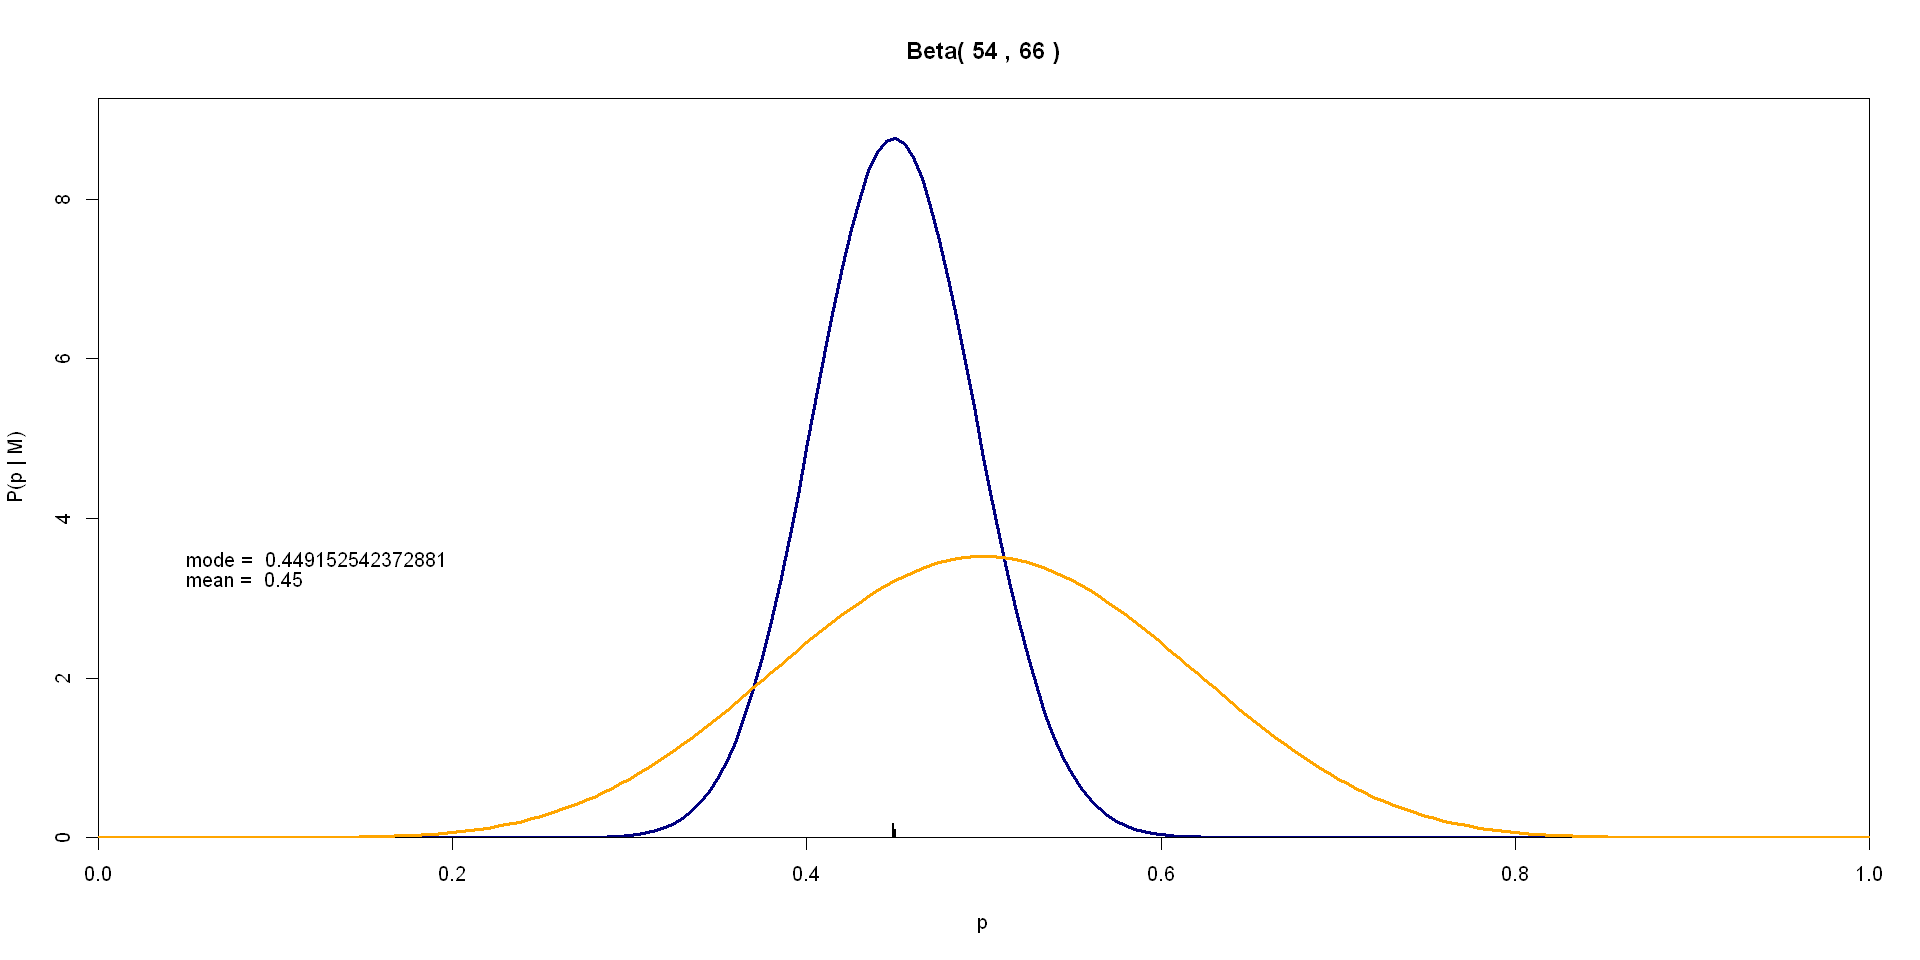

In [32]:
#Lets see how our posterior has evolved from our beta prior
n <- 100


r <- coins(n,prob)
output <-coinplot(n,r,prob)


n <- 0
r <- 0
prob <- 0.5
alpha <- 10+r; beta <- 10+n-r
p <- seq(0, 1, length.out = 201)
p.prior <- dbeta(p, alpha , beta)
lines(p, p.prior , xaxs="i", yaxs="i",
col="orange", type="l", lty=1, lwd = 3,
ylim=c(0,5),
xlab="p", ylab=paste("P(p | M)"),
main=paste("Beta(",alpha ,",",beta ,")"))